<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: Mariya Mansurova, Analyst & developer in Yandex.Metrics team. Translated by Ivan Zakharov, ML enthusiast. <br>This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #9 (demo)
## <center> Time series analysis

**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a9-demo-time-series-analysis) + [solution](https://www.kaggle.com/kashnitsky/a9-demo-time-series-analysis-solution).**

**Fill cells marked with "Your code here" and submit your answers to the questions through the [web form](https://docs.google.com/forms/d/1UYQ_WYSpsV3VSlZAzhSN_YXmyjV7YlTP8EYMg8M8SoM/edit).**

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests

print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

4.14.3


## Data preparation

In [2]:
df = pd.read_csv('../../data/wiki_machine_learning.csv', sep = ' ')
df = df[df['count'] != 0]
df

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
...,...,...,...,...,...,...,...
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning


In [3]:
df.shape

(383, 7)

## Predicting with FB Prophet

We will train at first 5 months and predict the number of trips for June. - **wrong**

Actually we have to predict last 30 days.

In [4]:
df.date = pd.to_datetime(df.date)

In [5]:
plotly_df(df.set_index('date')[['count']])

In [6]:
from fbprophet import Prophet

In [7]:
predictions = 30

df = df[['date', 'count']]
df.columns = ['ds', 'y']
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


**<font color='red'>Question 1:</font>** What is the prediction of the number of views of the wiki page on January 20? Round to the nearest integer.

- 4947
- **3426**
- 5229
- 2744

In [44]:
# train_df = df[(df.ds >= pd.Timestamp('2015-01-01')) & (df.ds <= pd.Timestamp('2015-05-31'))]
# train_df

train_df = df[:-predictions].copy()
train_df

,ds,y
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
358,2015-12-17,2870
363,2015-12-18,2475
364,2015-12-19,1659
344,2015-12-20,1534


In [9]:
prophet = Prophet()
prophet.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
test_df = prophet.make_future_dataframe(periods=predictions)
test_df

,ds
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05
...,...
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19


In [11]:
forecast = prophet.predict(test_df)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,2156.554478,2089.183140,2862.991370,2156.554478,2156.554478,326.990030,326.990030,326.990030,326.990030,326.990030,326.990030,0.0,0.0,0.0,2483.544508
1,2015-01-02,2159.400682,1760.211495,2561.152320,2159.400682,2159.400682,7.105028,7.105028,7.105028,7.105028,7.105028,7.105028,0.0,0.0,0.0,2166.505710
2,2015-01-03,2162.246886,931.802033,1722.576907,2162.246886,2162.246886,-861.666255,-861.666255,-861.666255,-861.666255,-861.666255,-861.666255,0.0,0.0,0.0,1300.580631
3,2015-01-04,2165.093090,1046.045942,1868.154028,2165.093090,2165.093090,-720.685978,-720.685978,-720.685978,-720.685978,-720.685978,-720.685978,0.0,0.0,0.0,1444.407112
4,2015-01-05,2167.939294,2020.817850,2863.834248,2167.939294,2167.939294,281.426215,281.426215,281.426215,281.426215,281.426215,281.426215,0.0,0.0,0.0,2449.365508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2016-01-16,2971.125440,1712.818319,2523.020149,2951.126875,2992.788517,-861.666255,-861.666255,-861.666255,-861.666255,-861.666255,-861.666255,0.0,0.0,0.0,2109.459185
379,2016-01-17,2976.423576,1825.628527,2685.826252,2955.084876,2999.499351,-720.685978,-720.685978,-720.685978,-720.685978,-720.685978,-720.685978,0.0,0.0,0.0,2255.737598
380,2016-01-18,2981.721713,2849.547233,3651.494220,2959.139703,3005.831470,281.426215,281.426215,281.426215,281.426215,281.426215,281.426215,0.0,0.0,0.0,3263.147928
381,2016-01-19,2987.019849,3100.853266,3958.509693,2962.542887,3012.169048,541.366440,541.366440,541.366440,541.366440,541.366440,541.366440,0.0,0.0,0.0,3528.386289


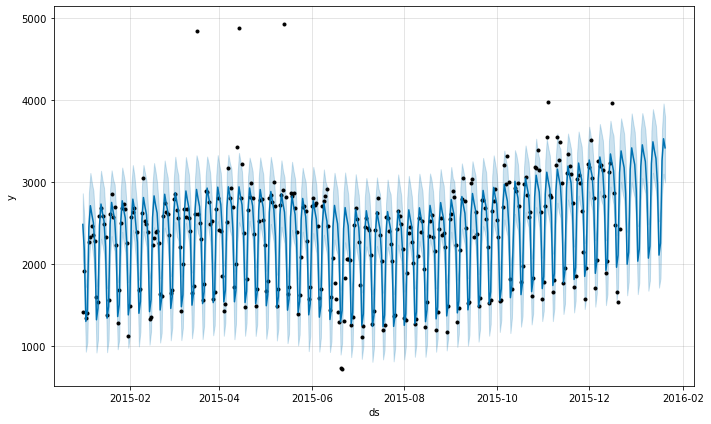

In [12]:
prophet.plot(forecast);

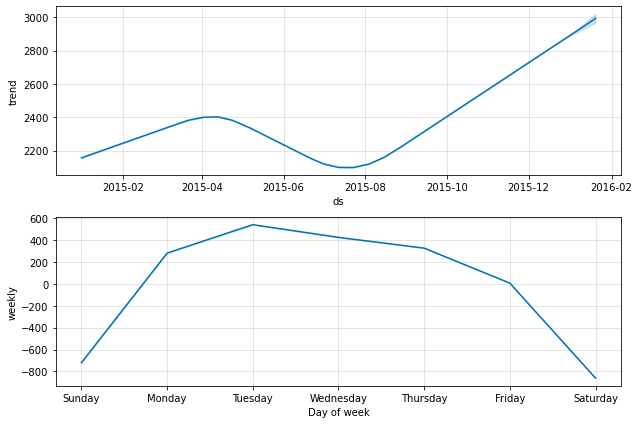

In [13]:
prophet.plot_components(forecast);

In [14]:
forecast[forecast.ds == '2016-01-20'].yhat

382    3417.782506
Name: yhat, dtype: float64

In [15]:
df[df.ds == '2016-01-20'].y

372    3559
Name: y, dtype: int64

Estimate the quality of the prediction with the last 30 points.

In [16]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [17]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2015-01-01,2483.544508,2089.183140,2862.991370,1414
2015-01-02,2166.505710,1760.211495,2561.152320,1920
2015-01-03,1300.580631,931.802033,1722.576907,1338
2015-01-04,1444.407112,1046.045942,1868.154028,1404
2015-01-05,2449.365508,2020.817850,2863.834248,2264
...,...,...,...,...
2016-01-16,2109.459185,1712.818319,2523.020149,1644
2016-01-17,2255.737598,1825.628527,2685.826252,1836
2016-01-18,3263.147928,2849.547233,3651.494220,2983


In [18]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [19]:
calculate_forecast_errors(cmp_df, prediction_size=predictions)

{'MAPE': 34.19380159794991, 'MAE': 593.3705390372357}

**<font color='red'>Question 2:</font> What is MAPE equal to?**

- **34.5**
- 42.42
- 5.39
- 65.91

**<font color='red'>Question 3:</font> What is MAE equal to?**

- 355
- 4007
- **600**
- 903

## Predicting with ARIMA

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

**<font color='red'>Question 4:</font> Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?**

- Series is stationary, p_value = 0.107
- **Series is not stationary, p_value = 0.107**
- Series is stationary, p_value = 0.001
- Series is not stationary, p_value = 0.001

In [22]:
# arima_df = df.set_index('ds').asfreq('d')
# arima_df.isna().sum()

In [23]:
# arima_df = arima_df.fillna(method='ffill')

In [24]:
# from sklearn.model_selection import train_test_split

# arima_train, arima_test = train_test_split(arima_df, test_size=predictions, shuffle=False)
# arima_train

In [45]:
train_df

,ds,y
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
358,2015-12-17,2870
363,2015-12-18,2475
364,2015-12-19,1659
344,2015-12-20,1534


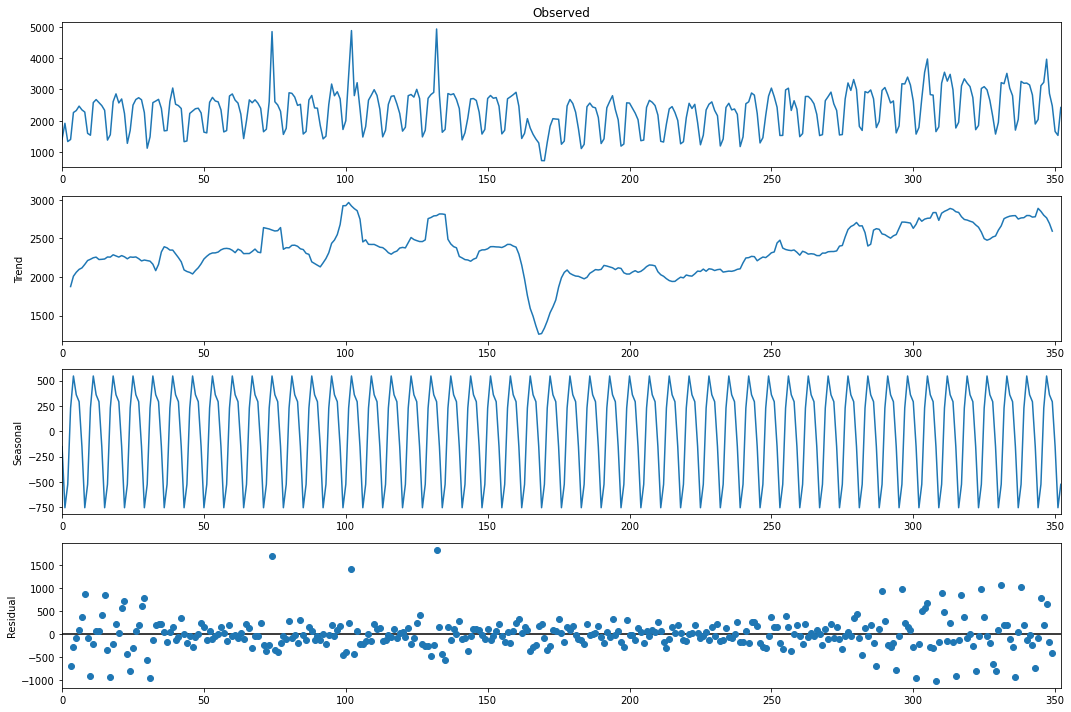

In [46]:
sm.tsa.seasonal_decompose(train_df['y'].values, freq=7).plot();

In [47]:
print("Dickey-Fuller criterion: p=%f" % 
      sm.tsa.stattools.adfuller(train_df['y'])[1])

Dickey-Fuller criterion: p=0.107392


**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> <font color='red'>Question 5:</font> What parameters are the best for the model according to the `AIC` criterion?**

- D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1
- D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 0, d = 0, Q = 0, q = 2, P = 3, p = 1

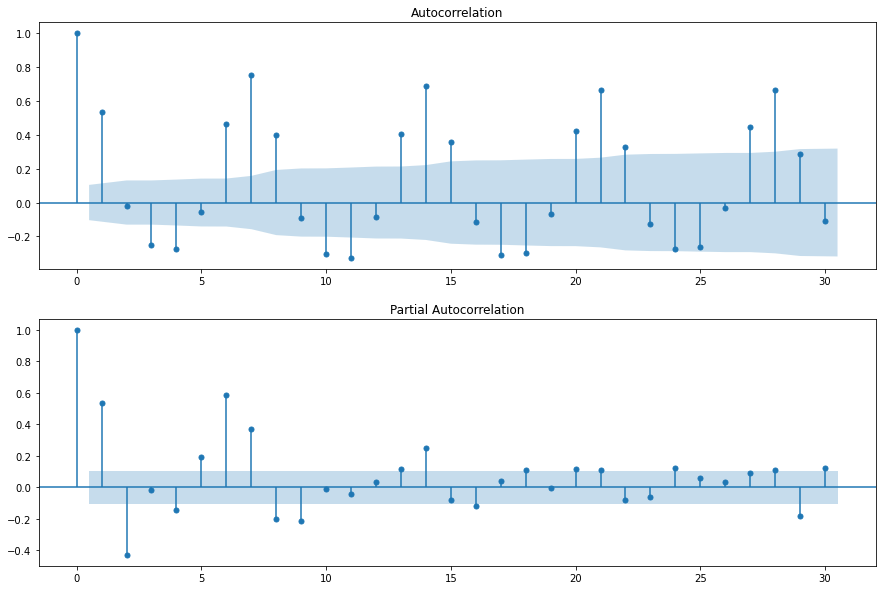

In [48]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(train_df['y'].values.squeeze(), 
                         lags=30, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(train_df['y'].values.squeeze(), 
                          lags=30, ax=ax);

In [49]:
train_df = train_df.set_index('ds')
train_df

,y
ds,
2015-01-01,1414
2015-01-02,1920
2015-01-03,1338
2015-01-04,1404
2015-01-05,2264
...,...
2015-12-17,2870
2015-12-18,2475
2015-12-19,1659


Dickey-Fuller criterion: p=0.000000


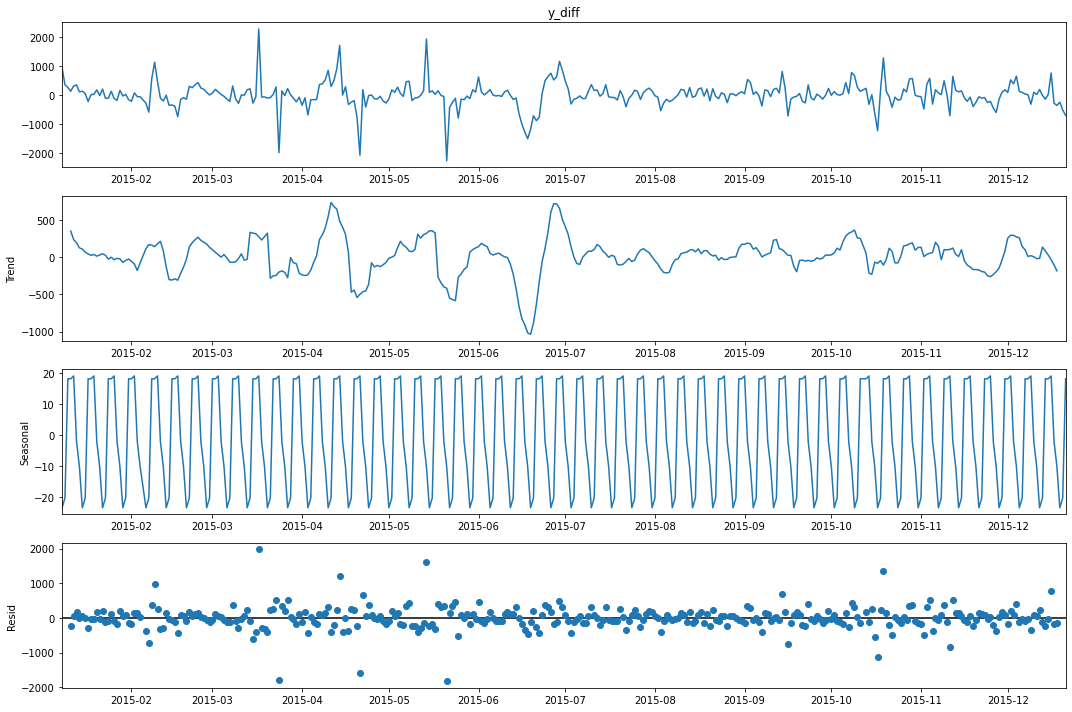

In [50]:
train_df['y_diff'] = train_df['y'] - train_df['y'].shift(7)
sm.tsa.seasonal_decompose(train_df['y_diff'][7:], freq=7).plot()
print("Dickey-Fuller criterion: p=%f" % sm.tsa.stattools.adfuller(train_df['y_diff'][7:])[1])

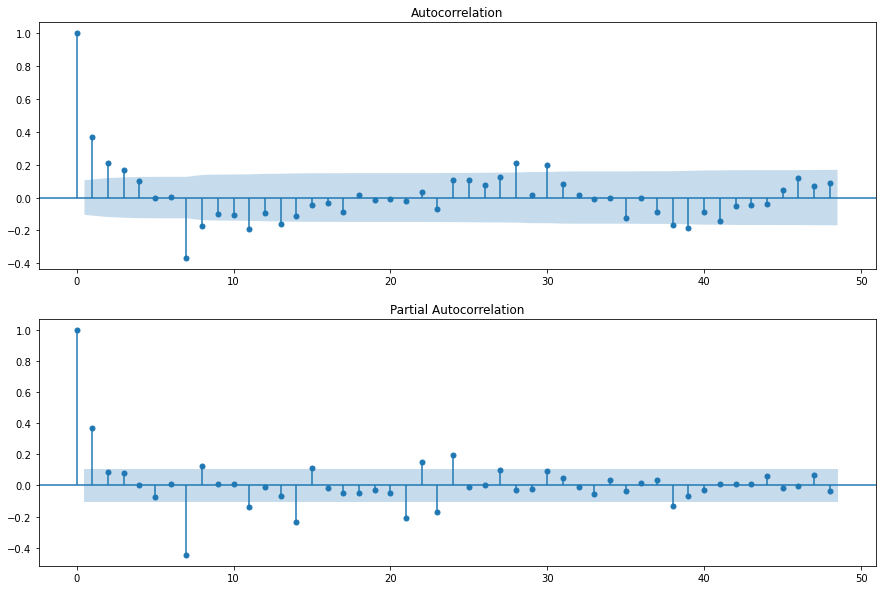

In [54]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(train_df['y_diff'][7:].values.squeeze(), 
                         lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(train_df['y_diff'][7:].values.squeeze(), 
                          lags=48, ax=ax);

Сезонность - неделя (7)
- D = 1
- d = 0
- P = 3
- p = 1
- Q = 1
- q = 3

In [55]:
ps = range(0, 2)
ds = range(0, 2)
qs = range(0, 4)
Ps = range(0, 4)
Ds = range(0, 3)
Qs = range(0, 2)

In [57]:
from itertools import product

parameters = product(ps, qs, Ps, Qs, ds, Ds)
parameters_list = list(parameters)
len(parameters_list)

384

In [58]:
parameters_list

[(0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 2),
 (0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 1, 2),
 (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1),
 (0, 0, 0, 1, 0, 2),
 (0, 0, 0, 1, 1, 0),
 (0, 0, 0, 1, 1, 1),
 (0, 0, 0, 1, 1, 2),
 (0, 0, 1, 0, 0, 0),
 (0, 0, 1, 0, 0, 1),
 (0, 0, 1, 0, 0, 2),
 (0, 0, 1, 0, 1, 0),
 (0, 0, 1, 0, 1, 1),
 (0, 0, 1, 0, 1, 2),
 (0, 0, 1, 1, 0, 0),
 (0, 0, 1, 1, 0, 1),
 (0, 0, 1, 1, 0, 2),
 (0, 0, 1, 1, 1, 0),
 (0, 0, 1, 1, 1, 1),
 (0, 0, 1, 1, 1, 2),
 (0, 0, 2, 0, 0, 0),
 (0, 0, 2, 0, 0, 1),
 (0, 0, 2, 0, 0, 2),
 (0, 0, 2, 0, 1, 0),
 (0, 0, 2, 0, 1, 1),
 (0, 0, 2, 0, 1, 2),
 (0, 0, 2, 1, 0, 0),
 (0, 0, 2, 1, 0, 1),
 (0, 0, 2, 1, 0, 2),
 (0, 0, 2, 1, 1, 0),
 (0, 0, 2, 1, 1, 1),
 (0, 0, 2, 1, 1, 2),
 (0, 0, 3, 0, 0, 0),
 (0, 0, 3, 0, 0, 1),
 (0, 0, 3, 0, 0, 2),
 (0, 0, 3, 0, 1, 0),
 (0, 0, 3, 0, 1, 1),
 (0, 0, 3, 0, 1, 2),
 (0, 0, 3, 1, 0, 0),
 (0, 0, 3, 1, 0, 1),
 (0, 0, 3, 1, 0, 2),
 (0, 0, 3, 1, 1, 0),
 (0, 0, 3, 1, 1, 1),
 (0, 0, 3, 1,

In [61]:
%%time
results = []
best_aic = float("inf")

warnings.filterwarnings('ignore')

from tqdm.notebook import tqdm

for param in tqdm(parameters_list):
    #try except is needed because some parameter combinations are not valid
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], 
                                                        7)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    # save best model, it's AIC and params
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

  0%|          | 0/384 [00:00<?, ?it/s]

Wall time: 10min 53s


In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

             parameters          aic
256  (1, 1, 1, 0, 1, 1)  5028.150318
268  (1, 1, 2, 0, 1, 1)  5028.821500
257  (1, 1, 1, 0, 1, 2)  5030.054654
262  (1, 1, 1, 1, 1, 1)  5030.081048
269  (1, 1, 2, 0, 1, 2)  5030.748937


In [67]:
import scipy.stats
train_df['y_box'], lmbda = scipy.stats.boxcox(train_df['y']) 
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.732841


In [68]:
results2 = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y_box'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], 7)).fit(disp=-1)
    #print parameters on which the model is not trained and proceed to the next set
    except (ValueError, np.linalg.LinAlgError):
        continue
    aic = model.aic
    #save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results2.append([param, model.aic])
    
warnings.filterwarnings('default')

  0%|          | 0/384 [00:00<?, ?it/s]

In [70]:
warnings.filterwarnings('ignore')

C:\Users\Vlad\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [71]:
result2_table = pd.DataFrame(results2)
result2_table.columns = ['parameters', 'aic']
print(result2_table.sort_values(by = 'aic', ascending=True).head())

             parameters          aic
256  (1, 1, 1, 0, 1, 1)  3564.223001
268  (1, 1, 2, 0, 1, 1)  3564.683591
220  (1, 0, 2, 0, 1, 1)  3564.969033
196  (1, 0, 0, 0, 1, 1)  3566.015082
232  (1, 0, 3, 0, 1, 1)  3566.149837


Very different result

In [72]:
print(best_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             y_box   No. Observations:                  353
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -1778.112
Date:                           Fri, 26 Mar 2021   AIC                           3564.223
Time:                                   00:03:06   BIC                           3579.597
Sample:                                        0   HQIC                          3570.346
                                           - 353                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4856      0.032     15.266      0.000       0.423       0.548
ma.L1         -0.9999      0.758     -1.320

Student's test: p=0.238346
Dickey-Fuller test: p=0.000000


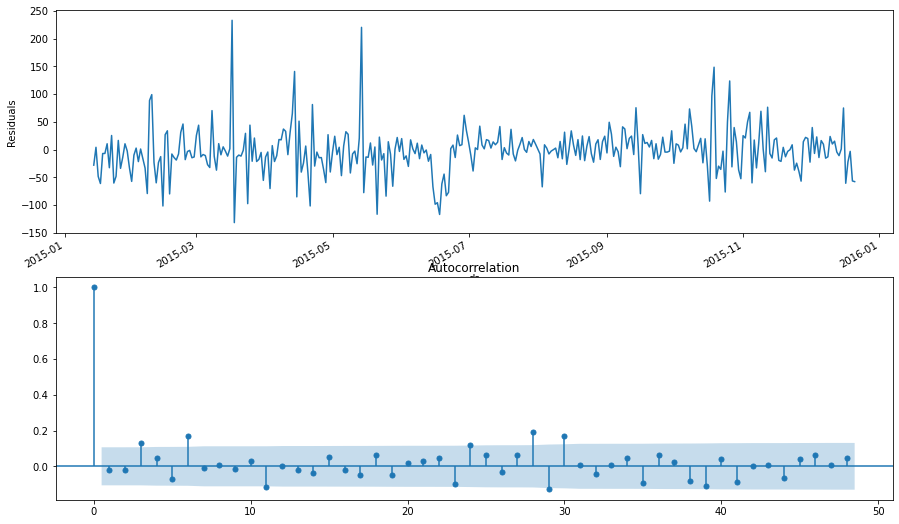

In [73]:
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Student's test: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

In [74]:
def invboxcox(y,lmbda):
    # reverse Box Cox transformation
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda * y + 1) / lmbda))

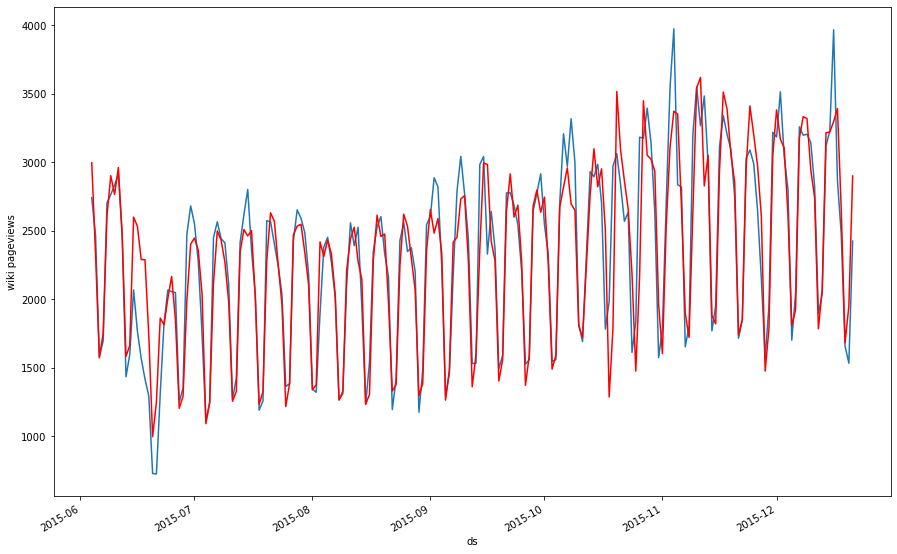

In [75]:
train_df['arima_model'] = invboxcox(best_model.fittedvalues, lmbda)

train_df.y.tail(200).plot()
train_df.arima_model[13:].tail(200).plot(color='r')
plt.ylabel('wiki pageviews');